# Discrete Fourier Transform (*D.F.T*)

Trigonometric expression of the *D.F.T.* (similar to Fourier series):

### Discrete Fourier Series (2nd trigonometric form)
$$
x(n) = A_0 + \sum_{k=1}^{L}\left[A(k)\cos\left(\frac{2\pi k n}{N}\right)+B(k)\sin\left(\frac{2\pi k n}{N}\right)\right]
$$
$$
\text{where: } L=\frac{N}{2} \text{when } N \text{ is even, or } L=\frac{(N-1)}{2} \text{ when } N \text{ is odd}
$$

### Fourier Coefficients

$$
A(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \cos{\frac{2\pi k n}{N}}
$$
$$
B(k) = \frac{2}{N} \sum_{n=0}^{N-1} x(n) \sin{\frac{2\pi k n}{N}}
$$
$$
A(0)=\frac{1}{N} \sum_{n=0}^{N-1}x(n)
$$

### *D.F.T.*
$$
X(k)=\frac{1}{2}A(k)-\frac{i}{2}B(k)
$$

### Amplitude Spectrum
$$
\vert{X(k)}=\frac{1}{2}\sqrt{A(k)^2+B(k)^2}
$$

### Phase Spectrum
$$
\varphi(k) = \tan^{-1}\left[-\frac{B(k)}{A(k)}\right]
$$

Due to the implicit simetry of $\sin$ and $\cos$ functions in the computations of the Fourier Coefficients:

$$
k=0,1,2, ..., \frac{N}{2} \qquad \text{when } N \text{ is even}
$$
$$
k=0,1,2, ..., \frac{N-1}{2} \qquad \text{when } N \text{ is odd}
$$

## Define a signal

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def FUNC_fourierCoefficients(x_n):
    # x_n is a 1D numpy array
    N = len(x_n)

    # "Odd" if n%2 else "even"
    L = (N-1)/2 if N % 2 else N/2
    L = int(L)
    
    AB_k = np.zeros((2,L))  # 2D numpy array, float64 by default, filled with zeros
                            # First 1D array for A(k) and second 1D for B(k)
    
    A0 = np.sum(x_n)/N
    
    for k in range(1,L+1):   # So it goes from 1 to L (remember how Python indexes work)
        for n in range(N):

            AB_k[0, k-1] = AB_k[0, k-1] + x_n[n] * np.cos((2*np.pi*k*n)/(N))
            AB_k[1, k-1] = AB_k[1, k-1] + x_n[n] * np.sin((2*np.pi*k*n)/(N))

    AB_k[:,:] = AB_k[:,:] *2.0/N
    return(A0, AB_k[0, :], AB_k[1, :])




def FUNC_DFS(A0, A_k, B_k, N):  #Discrete Fourier Series
    L = len(A_k)
    
    x_n = np.full((N), A0)
    
    for n in range(N):
        for k in range(1, L+1):

            x_n[n] = x_n[n] + (A_k[k-1] * np.cos((2*np.pi*k*n)/N) + B_k[k-1] * np.sin((2*np.pi*k*n)/N))

    
    return x_n

def FUNC_amplitudeSpectreum(A_k, B_k):
    L = len(A_k)
    ampX_k = np.zeros(L)

    for k in range(L):
        ampX_k[k] = (1/2) * ((A_k[k])**2 + (B_k[k])**2)**(0.5)
        
    return ampX_k

In [3]:
pi = math.pi

t0 = 0.0        # Time of first sample

dt = 0.002      # Define dt (Sampling interval or Sampling period)
fm = 1/dt       # fm: Sampling frequency or sampling rate
wm = 2*pi*fm    # wm: Sampling angular frequency or sampling angular rate


T = 9.998        # Observation period
f0 = 1/T        # Fundamental frequency
w0 = 2*pi*f0    # Fundamental angular frequency
print(f'''
Sampling interval (period): {dt} [s]
Sampling frequency (rate): {fm} [Hz]
Sampling angular frequency (angular rate): {wm} [Hz]
Observation period: {T} [s]
Fundamental frequency: {f0} Hz
Fundamental angular frequency: {w0} Hz
''')

# Creating time axis
time = np.arange(t0*1000,(T+dt)*1000,dt*1000)/1000
N = len(time)

fp = N/2*f0     # Folding frequency
wp = 2*pi*fp    # Angular folding frequency

print(time)
print(f'''
Number of samples: {N}
Folding frequency: {fp}
Angular folding frequency: {wp}
''')



Sampling interval (period): 0.002 [s]
Sampling frequency (rate): 500.0 [Hz]
Sampling angular frequency (angular rate): 3141.592653589793 [Hz]
Observation period: 9.998 [s]
Fundamental frequency: 0.10002000400080016 Hz
Fundamental angular frequency: 0.628444219561871 Hz

[0.000e+00 2.000e-03 4.000e-03 ... 9.994e+00 9.996e+00 9.998e+00]

Number of samples: 5000
Folding frequency: 250.0500100020004
Angular folding frequency: 1571.1105489046774



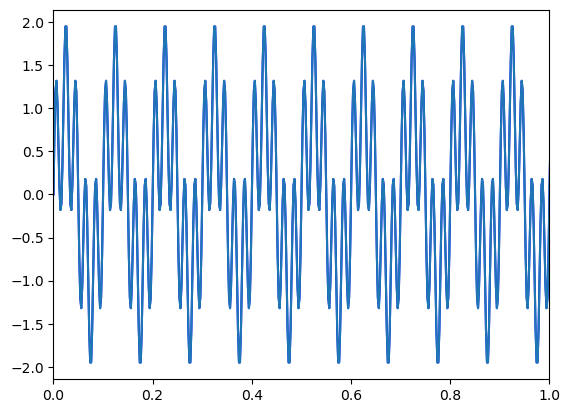

In [13]:
# Defning my function
funX = np.sin(10*2*pi*time) + np.sin(50*2*pi*time)
plt.plot(time, funX, color='b', label='Original Function')
plt.xlim(0,1)
plt.plot(time, funX)

In [14]:
A0, A_k, B_k = FUNC_fourierCoefficients(funX)
funX2 = FUNC_DFS(A0, A_k, B_k, N)

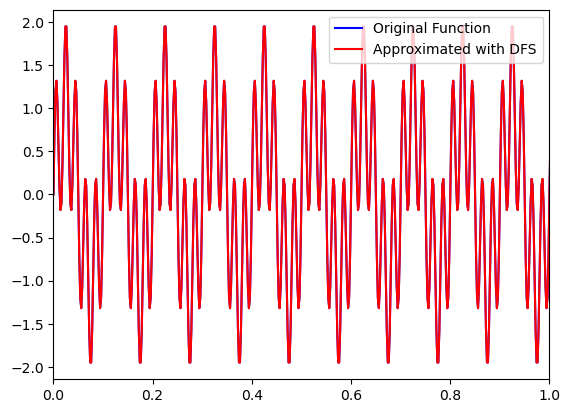

In [15]:
plt.plot(time, funX, color='b', label='Original Function')
plt.plot(time, funX2, color='r', label='Approximated with DFS')
plt.xlim(0,1)
plt.legend()

In [16]:
# Building the frequency axis

# if N % 2:   # Odd
#     f_axis = np.linspace(-fp,fp,num=N)
# else:       # Even
#     f_axis = np.linspace(-fp-f0,fp,num=N)

# odd if N%2 is TRUE, else 
f_axis = np.linspace(-fp,fp,num=N) if N % 2 else np.linspace(-fp-f0,fp,num=N)
f_axis

array([-250.15003001, -250.04996999, -249.94990997, ...,  249.84988996,
        249.94994998,  250.05001   ])

In [17]:
ampSpectrum = FUNC_amplitudeSpectreum(A_k, B_k)

(0.0, 100.0)

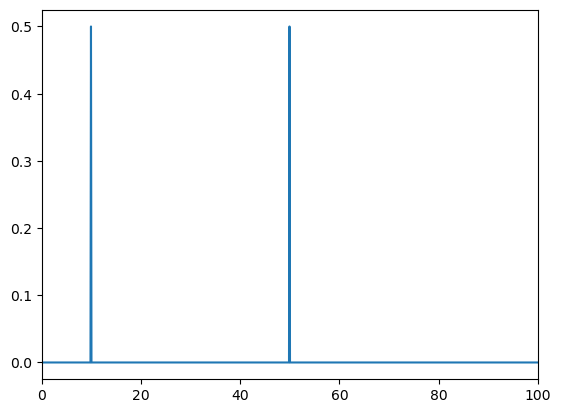

In [19]:
plt.plot(f_axis[int((N+1)/2):],ampSpectrum)
plt.xlim(0,100)

# NOTES
## Discrete periodic signal (REVIEW THIS, POSSIBLE WRONG):

$x(n)$ is a periodic signal with period $N$ if:

$$
x(n+N)=x(n)
$$

The DFT of a transitory signal, of finite duration is computed using Fourier coefficients for discrete and periodic signals

$$
X(k) = \frac{1}{N}\sum_{n=0}^{N-1} x(n) e^{-\frac{i2\pi kn}{N}} \qquad \forall \; k=0,1,2,3,...,N-1 \qquad\qquad \rightarrow \text{DFT}
$$

$$
x(n) = \sum_{k=0}^{N-1} X(k) e^{\frac{i2\pi kn}{N}} \qquad \forall \; n=0,1,2,3,...,N-1 \qquad\qquad \rightarrow \text{DFIT}
$$

Due to simetry in $\sin$ and $\cos$ functions implicit in the computation of Fourier coefficients:
$$
k=0,1,2,...,\frac{N}{2} \qquad N \text{is even}
$$

$$
k=0,1,2,...,\frac{N-1}{2} \qquad N \text{is odd}
$$

$k$ is a variable associated to the frequency (armonic index or number)